In [475]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [476]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [477]:
import pandas as pd   
import numpy as np    
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




### Область работы 2 (поиск  модели .... )

In [478]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = ...# содержит только имя файла, без имен папок !!!

In [479]:
wine_data = pd.read_csv('train.csv')
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019249,0.308119,0.110090,0.046589,-0.071502,0.090890,0.298510,-0.428505,-0.027443,-0.136929,-0.164886
volatile acidity,-0.019249,1.000000,-0.193696,0.097584,0.098649,-0.117890,0.100351,0.044907,-0.054374,-0.070820,0.036713,-0.224332
citric acid,0.308119,-0.193696,1.000000,0.088621,0.118834,0.110299,0.123885,0.139801,-0.151155,0.045080,-0.050179,0.022927
residual sugar,0.110090,0.097584,0.088621,1.000000,0.096714,0.321649,0.438185,0.798569,-0.166196,-0.030785,-0.404295,-0.140981
chlorides,0.046589,0.098649,0.118834,0.096714,1.000000,0.101924,0.222393,0.306691,-0.090465,0.042989,-0.404737,-0.275969
free sulfur dioxide,-0.071502,-0.117890,0.110299,0.321649,0.101924,1.000000,0.605713,0.304056,0.012516,0.084226,-0.237443,0.057952
total sulfur dioxide,0.090890,0.100351,0.123885,0.438185,0.222393,0.605713,1.000000,0.562273,0.014276,0.152732,-0.439156,-0.187903
density,0.298510,0.044907,0.139801,0.798569,0.306691,0.304056,0.562273,1.000000,-0.056469,0.080527,-0.802832,-0.392913
pH,-0.428505,-0.054374,-0.151155,-0.166196,-0.090465,0.012516,0.014276,-0.056469,1.000000,0.168643,0.075596,0.171493
sulphates,-0.027443,-0.070820,0.045080,-0.030785,0.042989,0.084226,0.152732,0.080527,0.168643,1.000000,-0.026955,0.064579


In [480]:
wine_data = wine_data.drop(['density','total sulfur dioxide'], axis=1 )
wine_data
y = wine_data['quality']
X = wine_data.drop('quality', axis=1)
y.replace([1, 2, 3, 4, 5, 6], 0, inplace= True)
y.replace([7, 8, 9], 1, inplace= True)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

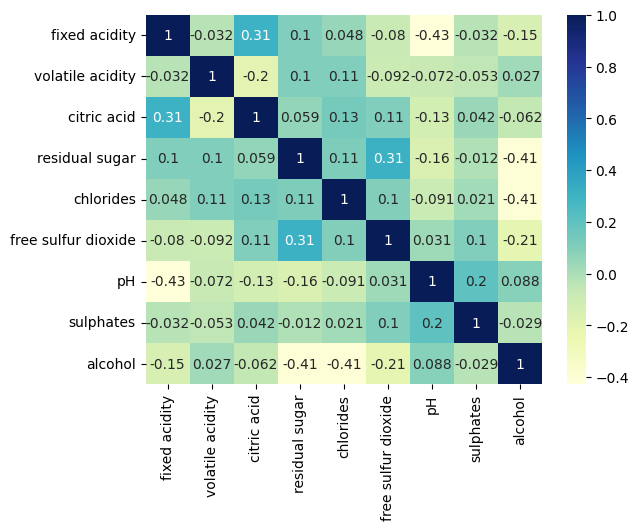

In [481]:
wine_data.corr()
dataplot = sns.heatmap(X_train.corr(),  cmap="YlGnBu", annot=True, )
mp.show()

In [482]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019249,0.308119,0.110090,0.046589,-0.071502,-0.428505,-0.027443,-0.136929,-0.107102
volatile acidity,-0.019249,1.000000,-0.193696,0.097584,0.098649,-0.117890,-0.054374,-0.070820,0.036713,-0.114323
citric acid,0.308119,-0.193696,1.000000,0.088621,0.118834,0.110299,-0.151155,0.045080,-0.050179,-0.012093
residual sugar,0.110090,0.097584,0.088621,1.000000,0.096714,0.321649,-0.166196,-0.030785,-0.404295,-0.173013
chlorides,0.046589,0.098649,0.118834,0.096714,1.000000,0.101924,-0.090465,0.042989,-0.404737,-0.251774
free sulfur dioxide,-0.071502,-0.117890,0.110299,0.321649,0.101924,1.000000,0.012516,0.084226,-0.237443,-0.018562
pH,-0.428505,-0.054374,-0.151155,-0.166196,-0.090465,0.012516,1.000000,0.168643,0.075596,0.135993
sulphates,-0.027443,-0.070820,0.045080,-0.030785,0.042989,0.084226,0.168643,1.000000,-0.026955,0.051285
alcohol,-0.136929,0.036713,-0.050179,-0.404295,-0.404737,-0.237443,0.075596,-0.026955,1.000000,0.488486
quality,-0.107102,-0.114323,-0.012093,-0.173013,-0.251774,-0.018562,0.135993,0.051285,0.488486,1.000000


Логистическая регрессия - лучший скор 0,504


In [503]:
from sklearn.model_selection import KFold, ShuffleSplit
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv1 = KFold(n_splits = 5)

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.6, n_splits = 2, random_state = 0)
cv2 = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2', 'l1', 'elasticnet', 'None'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)

grid  

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
128 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Program

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2', 'l1', 'elasticnet', 'None'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga', 'newton-cholesky'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [484]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
display(grid.best_params_)

grid_result

{'clf__penalty': 'l2',
 'clf__solver': 'newton-cg',
 'preprocessing': StandardScaler()}

,1,5,9,13,17,21,34,42,2,6,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.012477,0.008007,0.008003,0.008194,0.008002,0.00873,0.0,0.007432,0.02128,0.007643,...,0.000204,0.0,0.00716,0.0,0.007997,0.007867,0.003992,0.008,0.008907,0.004006
std_fit_time,0.004462,0.000032,0.000002,0.000034,0.000004,0.00244,0.0,0.007432,0.003058,0.00043,...,0.000204,0.0,0.00716,0.0,0.000001,0.000739,0.003992,0.000003,0.00091,0.004006
mean_score_time,0.004054,0.002299,0.0,0.004005,0.0,0.001031,0.008129,0.00048,0.0,0.002305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.004054,0.002299,0.0,0.004005,0.0,0.001031,0.008129,0.00048,0.0,0.002305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,l2,l2,l2,l2,l2,l2,l1,l1,l2,l2,...,None,None,None,None,None,None,None,None,None,None
param_clf__solver,newton-cg,lbfgs,liblinear,sag,saga,newton-cholesky,liblinear,saga,newton-cg,lbfgs,...,sag,sag,saga,saga,saga,saga,newton-cholesky,newton-cholesky,newton-cholesky,newton-cholesky
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...",...,"{'clf__penalty': 'None', 'clf__solver': 'sag',...","{'clf__penalty': 'None', 'clf__solver': 'sag',...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto..."
split0_test_score,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

,1,5,9,13,17,21,34,42,2,6,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.012477,0.008007,0.008003,0.008194,0.008002,0.00873,0.0,0.007432,0.02128,0.007643,...,0.000204,0.0,0.00716,0.0,0.007997,0.007867,0.003992,0.008,0.008907,0.004006
std_fit_time,0.004462,0.000032,0.000002,0.000034,0.000004,0.00244,0.0,0.007432,0.003058,0.00043,...,0.000204,0.0,0.00716,0.0,0.000001,0.000739,0.003992,0.000003,0.00091,0.004006
mean_score_time,0.004054,0.002299,0.0,0.004005,0.0,0.001031,0.008129,0.00048,0.0,0.002305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.004054,0.002299,0.0,0.004005,0.0,0.001031,0.008129,0.00048,0.0,0.002305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,l2,l2,l2,l2,l2,l2,l1,l1,l2,l2,...,None,None,None,None,None,None,None,None,None,None
param_clf__solver,newton-cg,lbfgs,liblinear,sag,saga,newton-cholesky,liblinear,saga,newton-cg,lbfgs,...,sag,sag,saga,saga,saga,saga,newton-cholesky,newton-cholesky,newton-cholesky,newton-cholesky
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...",...,"{'clf__penalty': 'None', 'clf__solver': 'sag',...","{'clf__penalty': 'None', 'clf__solver': 'sag',...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'saga'...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto...","{'clf__penalty': 'None', 'clf__solver': 'newto..."
split0_test_score,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


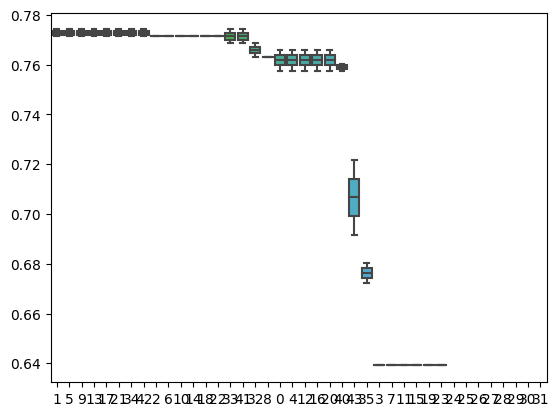

In [485]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:40]
sns.boxplot(data=tabl)
display(grid_result)

In [486]:
from sklearn.model_selection import KFold, ShuffleSplit
pipe = Pipeline([('preprocessing', MinMaxScaler), 
                 ('clf',           LogisticRegression())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv1 = KFold(n_splits = 5)

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.6, n_splits = 10, random_state = 0)
cv2 = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2', 'l1', 'elasticnet', 'None'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']}
    ]

grid = RandomizedSearchCV(pipe, param_grid, cv = cv, return_train_score = True, n_iter=200)
grid.fit(X_train, y_train)

grid  

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 96 is smaller than n_iter=200. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent 

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=0.6),
                   estimator=Pipeline(steps=[('preprocessing',
                                              <class 'sklearn.preprocessing._data.MinMaxScaler'>),
                                             ('clf', LogisticRegression())]),
                   n_iter=200,
                   param_distributions=[{'clf__penalty': ['l2', 'l1',
                                                          'elasticnet',
                                                          'None'],
                                         'clf__solver': ['newton-cg', 'lbfgs',
                                                         'liblinear', 'sag',
                                                         'saga',
                                                         'newton-cholesky'],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()]}],
                   return_train_score=True)

In [487]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
display(grid.best_params_)
grid_result

{'preprocessing': MinMaxScaler(),
 'clf__solver': 'liblinear',
 'clf__penalty': 'l2'}

,8,34,1,5,13,17,42,2,6,14,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.010239,0.004515,0.013786,0.005142,0.013253,0.008973,0.019025,0.009495,0.006868,0.019382,...,0.002786,0.003221,0.003125,0.003709,0.004302,0.002985,0.003191,0.003425,0.004116,0.001834
std_fit_time,0.007141,0.006201,0.007591,0.007095,0.007056,0.005697,0.004676,0.006059,0.00734,0.006763,...,0.005623,0.006443,0.006249,0.006215,0.005904,0.004087,0.005147,0.004101,0.00552,0.003156
mean_score_time,0.004929,0.001569,0.000077,0.001627,0.002803,0.002381,0.001,0.002416,0.002372,0.000882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.006655,0.004708,0.000231,0.004881,0.003692,0.004832,0.003,0.003691,0.005036,0.002647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_preprocessing,MinMaxScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
param_clf__solver,liblinear,liblinear,newton-cg,lbfgs,sag,saga,saga,newton-cg,lbfgs,sag,...,sag,sag,saga,saga,saga,saga,newton-cholesky,newton-cholesky,newton-cholesky,newton-cholesky
param_clf__penalty,l2,l1,l2,l2,l2,l2,l1,l2,l2,l2,...,None,None,None,None,None,None,None,None,None,None
params,"{'preprocessing': MinMaxScaler(), 'clf__solver...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': RobustScaler(), 'clf__solver...",...,"{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': Normalizer(), 'clf__solver':...","{'preprocessing': MinMaxScaler(), 'clf__solver...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': Normalizer(), 'clf__solver':...","{'preprocessing': MinMaxScaler(), 'clf__solver...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': Normalizer(), 'clf__solver':..."
split0_test_score,0.763085,0.774105,0.774105,0.774105,0.774105,0.774105,0.774105,0.77135,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.763085,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,0.77135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Наивный Байес - лучший скор 0.424

In [488]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv = StratifiedShuffleSplit(test_size = .4, train_size = .6, n_splits = 7, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=7, random_state=42, test_size=0.4,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [489]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.005864,0.005708,0.0064,0.001427
std_fit_time,0.003945,0.003841,0.003078,0.002745
mean_score_time,0.00243,0.0,0.005112,0.002057
std_score_time,0.003545,0.0,0.003421,0.002893
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.672878,0.672878,0.672878,0.511387
split1_test_score,0.718427,0.718427,0.718427,0.492754
split2_test_score,0.745342,0.745342,0.745342,0.490683


In [490]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])


In [491]:
grid.best_score_

0.7160603371783496

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

,0,1,2,3
mean_fit_time,0.005864,0.005708,0.0064,0.001427
std_fit_time,0.003945,0.003841,0.003078,0.002745
mean_score_time,0.00243,0.0,0.005112,0.002057
std_score_time,0.003545,0.0,0.003421,0.002893
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.672878,0.672878,0.672878,0.511387
split1_test_score,0.718427,0.718427,0.718427,0.492754
split2_test_score,0.745342,0.745342,0.745342,0.490683


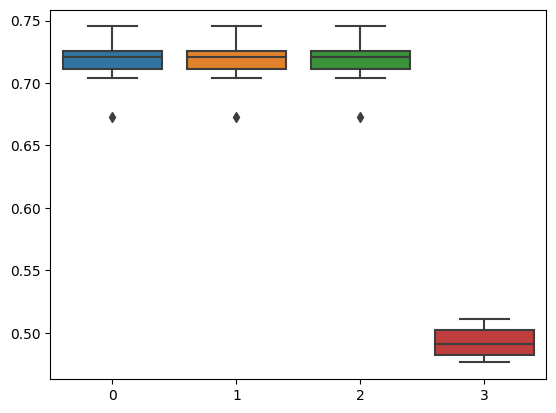

In [492]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)
display(grid_result)

Метод соседей - лучший скор 

In [493]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('knn',           KNeighborsClassifier())])
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

#knk = KNeighborsClassifier()
param_grid = [{
    'preprocessing': scaling,
    'knn__n_neighbors': np.arange(20, 40, 2),
    'knn__p': [4, 5, 6],
}]

#cv = KFold()

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
                          'knn__p': [4, 5, 6],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [494]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20, p=6))])

In [495]:
grid.best_score_

0.7360881542699724

In [496]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,8,32,40,48,108,28,109,44,112,20,...,63,75,99,67,107,103,111,71,115,119
mean_fit_time,0.009914,0.009487,0.0,0.009529,0.0,0.007397,0.003942,0.0,0.003517,0.005244,...,0.004828,0.006358,0.004329,0.010036,0.000182,0.006249,0.00323,0.000447,0.004849,0.0
std_fit_time,0.005841,0.007747,0.0,0.007781,0.0,0.006375,0.007884,0.0,0.004317,0.004353,...,0.003943,0.005917,0.003674,0.005931,0.000365,0.007653,0.006461,0.000895,0.006189,0.0
mean_score_time,0.101624,0.073698,0.092109,0.078633,0.079819,0.072336,0.098611,0.093244,0.108396,0.115846,...,0.048324,0.038611,0.049624,0.039875,0.04247,0.039462,0.038585,0.04122,0.040165,0.040832
std_score_time,0.036447,0.016209,0.017475,0.014062,0.014255,0.007772,0.015168,0.012055,0.041807,0.040402,...,0.026484,0.005762,0.007888,0.012859,0.005565,0.006434,0.006853,0.007074,0.00803,0.014203
param_knn__n_neighbors,20,24,26,28,38,24,38,26,38,22,...,30,32,36,30,36,36,38,30,38,38
param_knn__p,6,6,5,4,4,5,4,6,5,6,...,4,4,4,5,6,5,4,6,5,6
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'knn__n_neighbors': 20, 'knn__p': 6, 'preproc...","{'knn__n_neighbors': 24, 'knn__p': 6, 'preproc...","{'knn__n_neighbors': 26, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 28, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 24, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 26, 'knn__p': 6, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 22, 'knn__p': 6, 'preproc...",...,"{'knn__n_neighbors': 30, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 32, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 36, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 30, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 36, 'knn__p': 6, 'preproc...","{'knn__n_neighbors': 36, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 4, 'preproc...","{'knn__n_neighbors': 30, 'knn__p': 6, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 5, 'preproc...","{'knn__n_neighbors': 38, 'knn__p': 6, 'preproc..."
split0_test_score,0.719008,0.719008,0.719008,0.713499,0.710744,0.719008,0.730028,0.713499,0.713499,0.710744,...,0.663912,0.669421,0.663912,0.674931,0.663912,0.661157,0.663912,0.669421,0.666667,0.666667
split1_test_score,0.743802,0.749311,0.752066,0.743802,0.738292,0.752066,0.741047,0.746556,0.735537,0.738292,...,0.680441,0.68595,0.680441,0.669421,0.677686,0.680441,0.68595,0.672176,0.677686,0.672176


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: >

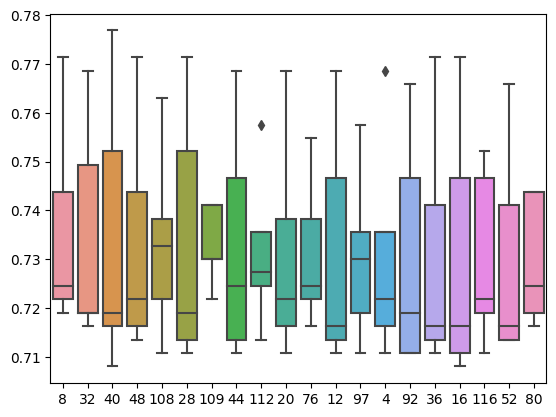

In [497]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:20]
sns.boxplot(data=tabl)

In [498]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pipe.score(X_train, y_train)
pipe.score(X_test, y_test)

0.7413127413127413

In [499]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

logistic = LogisticRegression()

# заданный метод кросс-валидации с перемешиванием
shuffle_split = ShuffleSplit(test_size = .4, train_size = .6, n_splits = 5, random_state = 42)
#cross_vall = cross_val_score(logistic, X_train, y_train, cv=shuffle_split)
cross_vall = cross_val_score(logistic, X_train, y_train, cv=5)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0.7479 0.7231 0.7635 0.7386 0.7635]


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Реализация лучшей модели

In [500]:
pipe_best = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2') )
pipe_best.fit(X_train,y_train)
y_pred_best = pipe_best.predict(X_test)
y_pred_best



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [501]:
from sklearn.metrics import classification_report

print('Лучшая, но явно переобученная')
print(classification_report(y_test, y_pred_best))

Лучшая, но явно переобученная
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       336
           1       0.66      0.55      0.60       182

    accuracy                           0.74       518
   macro avg       0.72      0.70      0.71       518
weighted avg       0.74      0.74      0.74       518



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])


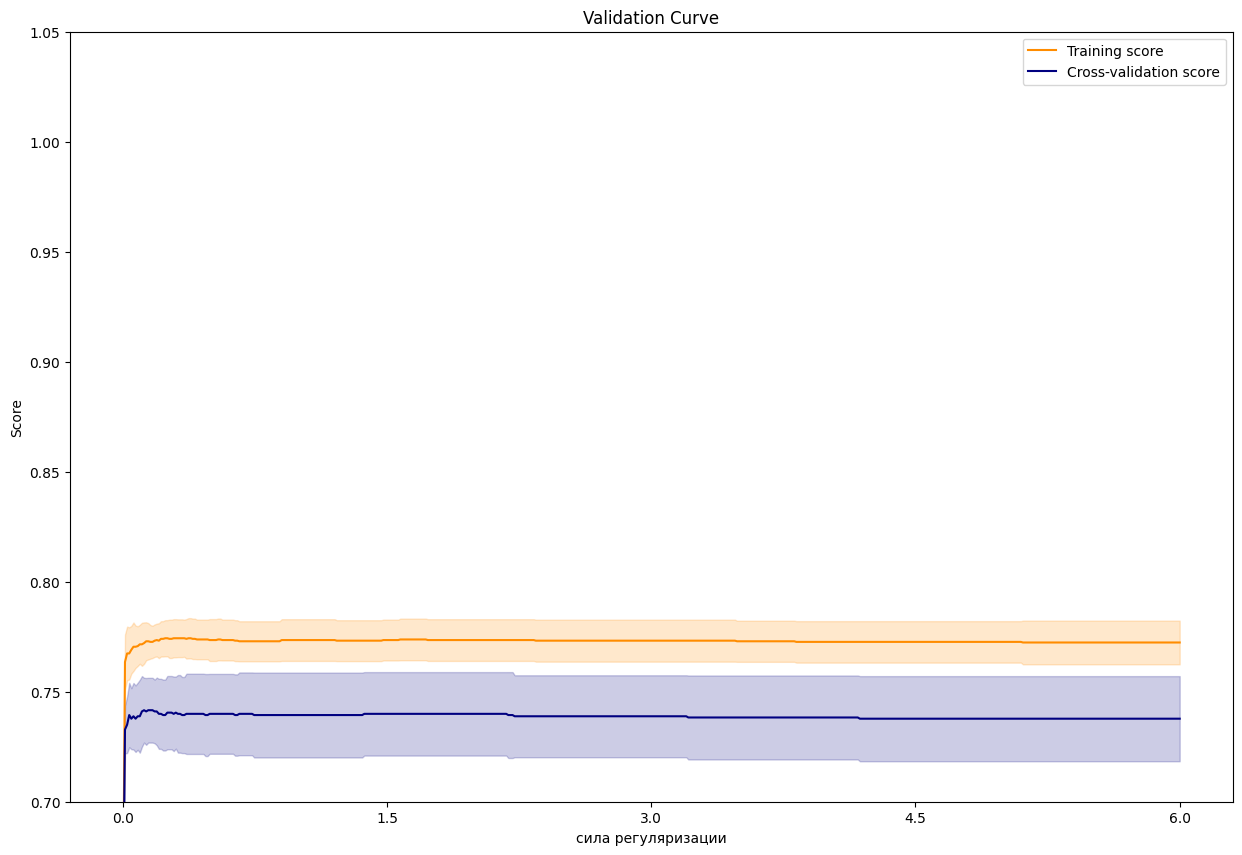

In [502]:
import matplotlib.pyplot as plt   
pipe_fin = make_pipeline( StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2'))
print(pipe_fin)

from sklearn.model_selection import validation_curve

n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_fin , X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show()